In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,NaN,0.44,NaN,NaN,NaN,0.0,0.54,0.22
4,0.42,NaN,NaN,NaN,NaN,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,NaN,NaN,NaN,NaN,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	371
float64		column 2	222
float64		column 3	518
float64		column 4	519
float64		column 5	222
float64		column 6	0
float64		column 7	371
float64		column 8	149


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1113.000000,1262.000000,966.000000,965.000000,1262.000000,1484.000000,1113.000000,1335.000000
mean,0.501536,0.498796,0.500166,0.258756,0.503962,0.007500,0.501051,0.275663
std,0.133744,0.120958,0.084860,0.133573,0.044349,0.075683,0.056804,0.105563
min,0.110000,0.140000,0.210000,0.040000,0.500000,0.000000,0.000000,0.010000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.560000,0.310000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,0.750000,0.820000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

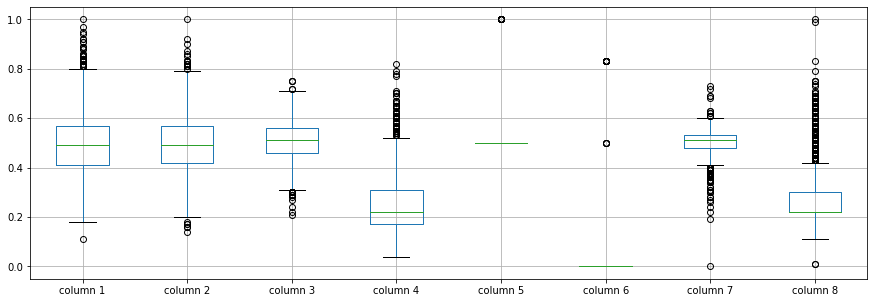

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.501536
column 2    0.498796
column 3    0.500166
column 4    0.258756
column 5    0.503962
column 6    0.007500
column 7    0.501051
column 8    0.275663
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.503206,-0.117598,0.157574,0.082459,-0.029615,0.040361,-0.108843
column 2,0.503206,1.000000,-0.211245,0.159550,0.000965,0.008588,0.049284,-0.079837
column 3,-0.117598,-0.211245,1.000000,0.007140,0.011765,0.037721,-0.148025,0.024853
column 4,0.157574,0.159550,0.007140,1.000000,0.056257,-0.027168,-0.118378,-0.035052
column 5,0.082459,0.000965,0.011765,0.056257,1.000000,-0.008599,0.030524,0.010708
column 6,-0.029615,0.008588,0.037721,-0.027168,-0.008599,1.000000,0.014008,-0.031836
column 7,0.040361,0.049284,-0.148025,-0.118378,0.030524,0.014008,1.000000,0.062136
column 8,-0.108843,-0.079837,0.024853,-0.035052,0.010708,-0.031836,0.062136,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+44,8+44+44,8+44+44+44,8+44+44+44+44,8+44+44+44+44+44,8+44+44+44+44+44+44,8+44+44+44+44+44,8+44+44+44+44,8+44+44+44,8+44+44,8+44,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.279661989730337
Epoch: 1 , loss: 1.9012263287668643
Epoch: 2 , loss: 1.7623749841814456
Epoch: 3 , loss: 1.6434315391208814
Epoch: 4 , loss: 1.5440917533376943
Epoch: 5 , loss: 1.4826400254083716
Epoch: 6 , loss: 1.4075737673303355
Epoch: 7 , loss: 1.3348367512226105
Epoch: 8 , loss: 1.2748994328405545
Epoch: 9 , loss: 1.2593356552331343
Epoch: 10 , loss: 1.2079235645739927
Epoch: 11 , loss: 1.158256959008134
Epoch: 12 , loss: 1.1320263996072437
Epoch: 13 , loss: 1.0964809954166412
Epoch: 14 , loss: 1.0839648978865666
Epoch: 15 , loss: 1.0609326602324196
Epoch: 16 , loss: 1.034077617785205
Epoch: 17 , loss: 1.0311582852964816
Epoch: 18 , loss: 0.9978903823572657
Epoch: 19 , loss: 0.9665267033421475
Epoch: 20 , loss: 0.956184063916621
Epoch: 21 , loss: 0.9385655943466269
Epoch: 22 , loss: 0.9557130395070367
Epoch: 23 , loss: 0.9265079634345096
Epoch: 24 , loss: 0.9158703846775967
Epoch: 25 , loss: 0.89

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,-0.043884,0.000000,-0.035022,0.145242,0.034596,0.0,0.0,0.0
4,0.000000,0.143650,0.105761,-0.244621,0.082428,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.000000,-0.155846,0.006096,0.066622,-0.026157,0.0,0.0,0.0
1480,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1481,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1482,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(7.926208791482909, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.16898738916092898

In [18]:
new_df.iloc[66,:]

column 1    0.460000
column 2    0.577324
column 3    0.581648
column 4    0.286719
column 5    0.589207
column 6    0.000000
column 7    0.440000
column 8    0.220000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.610000,0.470000,0.130000,0.500000,0.0,0.48,0.22
1,0.430000,0.670000,0.480000,0.270000,0.500000,0.0,0.53,0.22
2,0.640000,0.620000,0.490000,0.150000,0.500000,0.0,0.53,0.22
3,0.536116,0.440000,0.534978,0.275242,0.534596,0.0,0.54,0.22
4,0.420000,0.583650,0.585761,0.295379,0.582428,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.820000,0.474154,0.476096,0.246622,0.473843,0.0,0.50,0.22
1480,0.350000,0.290000,0.460000,0.140000,0.500000,0.0,0.54,0.66
1481,0.410000,0.470000,0.500000,0.140000,0.500000,0.0,0.53,0.37
1482,0.510000,0.450000,0.620000,0.250000,0.500000,0.0,0.59,0.22


In [20]:
imputations[-1].to_excel("Yeast_AN_20(imp).xlsx", index=False, header=False)